## Principal Component Analysis

Data Description
* id: renter ID
* name: name of airbnb
* host_id: host ID
* host_name: host Name
* neigbhourhood_group: location of the airbnb
* neighbourhood: exact community of the airbnb inside the location
* latitude: latitude of the location
* longitude: longtitude of the location
* room_type: type of room to be lent out
* price: price level 
* minimum_nights: minimun nights to rent
* number_of_reviews: number of review in Airbnb
* last_review: last review updated (assume the further the unpopular, not available, cleanness)
* reviews_per_month: reviews received per month
* calculated_host_listings_count: how many properties a specific host has listed on the platform
* availability_365: how many days available for rental

This project is to perform a PCA and build a predictive model for price. 

Project Guidelines
* Data Loading
* Data Cleaning and Preprocessing
* Exploratory Data Analysis
* Modeling and Prediction
* Conclusions and Future Work

In [21]:
# Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Import GeoMap with inputs: latitude and longitude
import folium

from sklearn.decomposition import PCA

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [25]:
# import csv file 
current_path = os.getcwd()
fName = "airbnb.csv"
fPath = os.path.join(current_path, fName)
df = pd.read_csv(fPath)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [29]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [31]:
counts = df.groupby('room_type')['price'].count()
counts

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: price, dtype: int64

In [180]:
# Normalize price of home
df['price_per_night'] = df['price'] / df['minimum_nights']

<class 'pandas.core.frame.DataFrame'>
Index: 25409 entries, 1 to 48892
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   room_type        25409 non-null  object 
 1   price_per_night  25409 non-null  float64
 2   minimum_nights   25409 non-null  float64
dtypes: float64(2), object(1)
memory usage: 794.0+ KB
88.1438377599996


<Axes: >

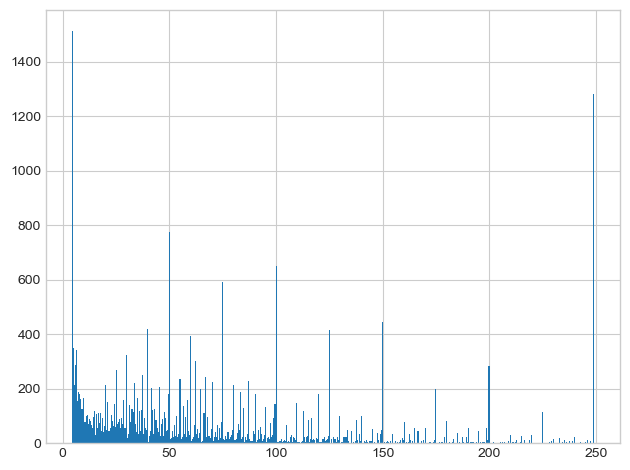

In [182]:
df_entire_home = df[['room_type', 'price_per_night', 'minimum_nights']].where(df['room_type']=='Entire home/apt')
df_entire_home = df_entire_home.dropna()
df_entire_home.info()
df_entire_home.describe()
mean_entire_home = df_entire_home['price_per_night'].mean()
df_entire_home_cap = df_entire_home['price_per_night'].clip(
    lower=df_entire_home['price_per_night'].quantile(0.05),
    upper=df_entire_home['price_per_night'].quantile(0.95)
)
print(mean_entire_home)
df_entire_home_cap.hist(bins=500)

<class 'pandas.core.frame.DataFrame'>
Index: 22326 entries, 0 to 48894
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   room_type        22326 non-null  object 
 1   price_per_night  22326 non-null  float64
 2   minimum_nights   22326 non-null  float64
dtypes: float64(2), object(1)
memory usage: 697.7+ KB
50.84169504930185


<Axes: >

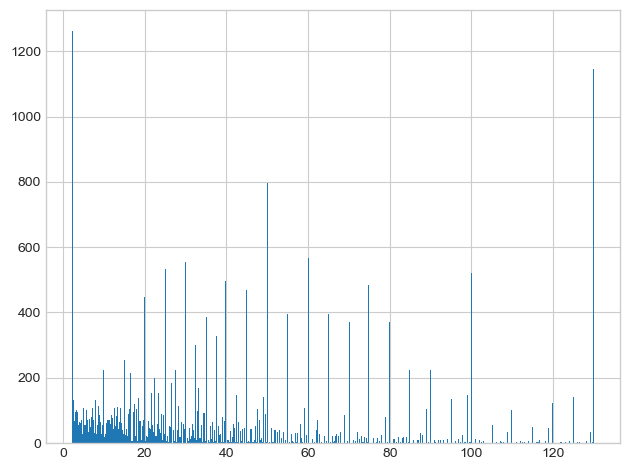

In [183]:
df_private_room = df[['room_type', 'price_per_night', 'minimum_nights']].where(df['room_type']=='Private room')
df_private_room = df_private_room.dropna()
df_private_room.info()
df_private_room.describe()
mean_proom = df_private_room['price_per_night'].mean()
df_private_room_cap = df_private_room['price_per_night'].clip(
    lower=df_private_room['price_per_night'].quantile(0.05),
    upper=df_private_room['price_per_night'].quantile(0.95)
)
print(mean_proom)
df_private_room_cap.hist(bins=500)

<class 'pandas.core.frame.DataFrame'>
Index: 1160 entries, 39 to 48893
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   room_type        1160 non-null   object 
 1   price_per_night  1160 non-null   float64
 2   minimum_nights   1160 non-null   float64
dtypes: float64(2), object(1)
memory usage: 36.2+ KB
48.64772602847686


<Axes: >

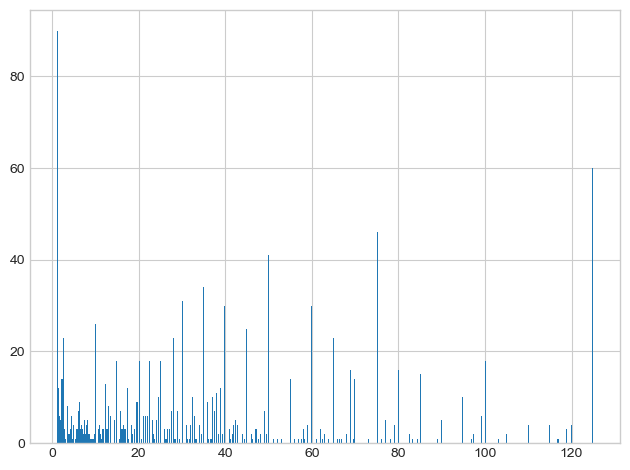

In [186]:
df_shared_room = df[['room_type', 'price_per_night', 'minimum_nights']].where(df['room_type']=='Shared room')
df_shared_room = df_shared_room.dropna()
df_shared_room.info()
df_shared_room.describe()
mean_shared_room = df_shared_room['price_per_night'].mean()
df_shared_room_cap = df_shared_room['price_per_night'].clip(
    lower=df_shared_room['price_per_night'].quantile(0.05),
    upper=df_shared_room['price_per_night'].quantile(0.95)
)
print(mean_shared_room)
df_shared_room_cap.hist(bins=500)

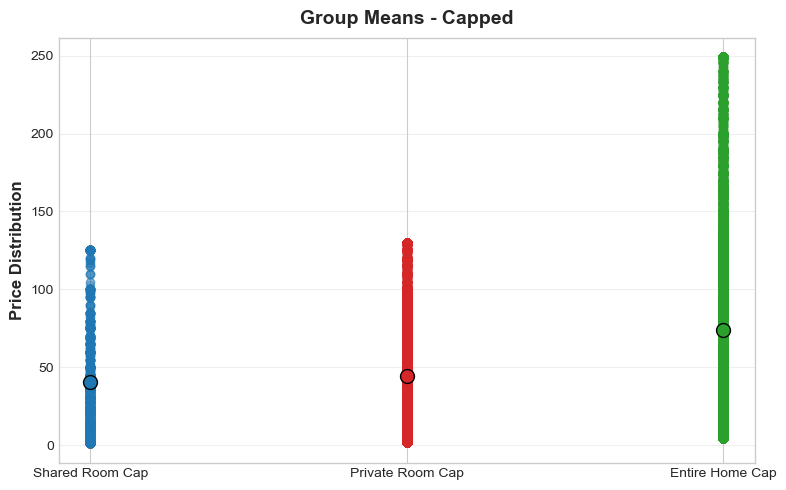

In [188]:
datasets = [df_shared_room_cap, df_private_room_cap, df_entire_home_cap]
colors = ['tab:blue', 'tab:red', 'tab:green']
labels = ['Shared Room Cap', 'Private Room Cap', 'Entire Home Cap']
plt.figure(figsize=(8, 5))

for i, data in enumerate(datasets):
    x = np.full(len(data), i)           # same x for each group
    mean = data.mean()

    # individual points
    plt.scatter(x, data, color=colors[i], alpha=0.3)

    # mean (bigger dot)
    plt.scatter(i, mean, color=colors[i], s=100, edgecolor='black', zorder=3)

plt.xticks(range(3), labels)
plt.ylabel("Price Distribution")
plt.title("Group Means - Capped")
plt.grid(axis='y', alpha=0.3)
plt.show()

In [198]:
# Generate a couple locations
df_location = df.where(df['price'] > 8000)
df_location = df_location.dropna()
df_location = df_location[['latitude', 'longitude']].values.tolist()

map_locations = folium.Map(location=[40.64749, -73.97237], zoom_start=12)

for loc in df_location:
    folium.Marker(
        location=loc,
        popup="A Location").add_to(map_locations)

output_file = 'location.html'
map_locations.save(output_file)

The 5 most expensive Airbnb on the map

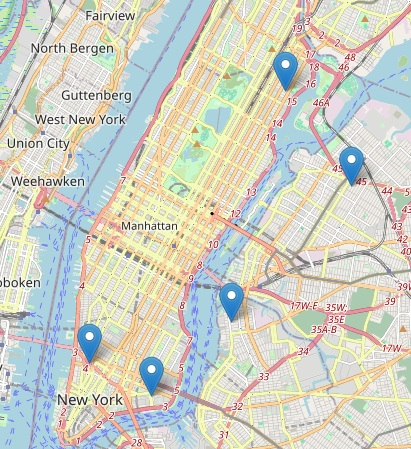


In [200]:
# PCA only works with numeric features like continuous quantities or counts
# sensitive to scale - standardize your data before applying PCA unless you have good reason
# Removing and constraining outliers

# Data Cleaning
# features = ['number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
# features = ['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'availability_365']
features = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

X = df.copy()
X = X.dropna()
y = X.pop('price')
X = X.loc[:, features]
X

,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,1,9,0.21,365
1,1,45,0.38,355
3,1,270,4.64,194
4,10,9,0.10,0
5,3,74,0.59,129
...,...,...,...,...
48782,1,1,1.00,147
48790,1,1,1.00,339
48799,1,1,1.00,87
48805,1,2,2.00,40


In [213]:
# Standardize 
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [215]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,-0.016114,0.989868,-1.851322,-0.236612
1,0.511724,0.906082,-1.555104,-0.685003
2,4.794924,-0.268534,1.270092,-2.124162
3,-1.115904,-0.226359,0.498923,-0.221778
4,0.360460,-0.052851,-0.006405,-0.992284


There are 5 rows because we have 4 features with one variable with price. These are the new features in the score matrix, and they transform the existing data into a new set of dimensions without changing the variables and samples. The scores mean that the row 2 got a score of 4.754666 in a standardized normal distribution with a centered mean of 0. Row 2 has a high score..1) far distance from the mean, 2) direction: positive score - exhibits characteristics strongly aligned with the positive / negative direction of that component. 3) outlier might impact the score

In [217]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=component_names,
    index=X.columns
)
loadings

,PC1,PC2,PC3,PC4
minimum_nights,-0.133782,0.804926,0.573707,0.071111
number_of_reviews,0.653679,-0.037175,0.291053,-0.697574
reviews_per_month,0.657261,-0.109507,0.218540,0.712921
availability_365,0.350448,0.581997,-0.733750,-0.008765


This is a loading matrix which describes different aspects of the PCA result. Each weight represents importance of each original variable to PCs. e.g. number of reviews and reviews per month are strongly positively correlated with PC1

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

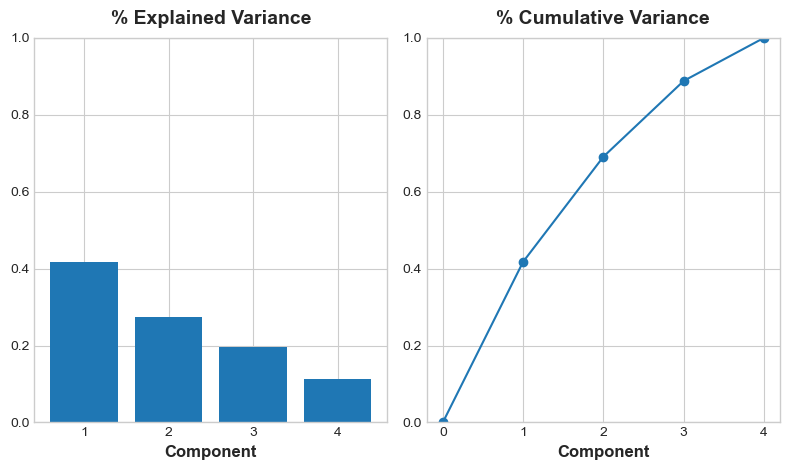

In [219]:
plot_variance(pca)

In [221]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC2    0.040355
PC3    0.033156
PC4    0.021222
PC1    0.017974
Name: MI Scores, dtype: float64

In [223]:
idx = X_pca['PC1'].sort_values(ascending=False).index
cols = ['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
df.loc[idx, cols]

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365
34981,Brooklyn,Private room,1,33,3.24,11
10105,Brooklyn,Entire home/apt,2,15,0.32,0
16977,Brooklyn,Private room,7,38,1.08,10
11356,Manhattan,Entire home/apt,2,62,1.62,231
22800,Brooklyn,Private room,5,16,0.61,37
...,...,...,...,...,...,...
26489,Queens,Private room,1,1,0.05,0
6532,Manhattan,Private room,6,0,NaN,0
21974,Brooklyn,Entire home/apt,7,2,0.08,0
11295,Queens,Shared room,1,39,0.87,351


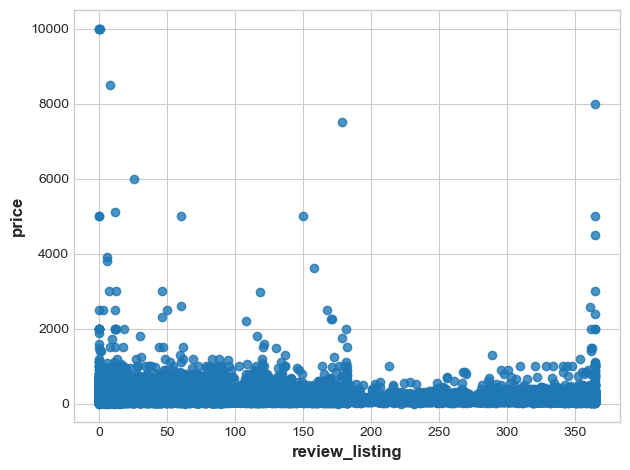

In [245]:
df["review_listing"] = X.availability_365 / X.minimum_nights 
sns.regplot(x="review_listing", y='price', data=df, order=2);